In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import random as rd
import math
import os
from sklearn import preprocessing

In [2]:
# set current path
os.chdir("/Users/liman/Desktop/MATH 5470 Statistical Machine Learning")

## Data preprocessing

In [3]:
medical = pd.read_csv('medical data.csv')
# delete all 0 col
all_0 = (medical==0).all()
data = medical.drop(all_0[all_0].index, axis=1)
# change columns names
data.rename(columns={'Unnamed: 0':'type','Sample Name':'ID'}, inplace = True)
data = data.loc[:65,:]
#extract features to X
#X = data.loc[:65,:].drop(['type', 'ID'], axis=1)
#Y = data.loc[:65, ['type']]
#Control-high
C_H = data[data.type.isin(['Control', 'High-risk'])]
#Control-low
C_L =  data[data.type.isin(['Control', 'Low-risk'])]
#High-low
H_L =  data[data.type.isin(['Low-risk', 'High-risk'])]


In [4]:
data.groupby('type').mean()

,GSSG,8-OH-dG,GSH,L-Leucine,L-Kynurenine,L-Tryptophan,5-HTP,Cholic acid,N-phenylacetylglycine,5-HT,...,glutamine,threonine,betaine,histidine,methionine,serine-1,pyroglutamic acid,benzene acetyl glycine,N6-acetyl lysine,nicotinamide
type,,,,,,,,,,,,,,,,,,,,,
Control,0.001567,1.098556,0.012986,413.888889,1.422167,14.305556,0.044526,0.010166,0.296706,0.773833,...,0.021956,0.000000,75.233333,0.085056,0.000000,0.000215,0.000000,0.000000,16.705556,0.010717
High-risk,0.000454,0.236075,0.007790,269.000000,0.643800,5.886500,0.016189,0.001953,0.055855,0.443050,...,0.008626,0.000000,43.840000,0.011604,0.000040,0.000000,2.254500,0.046550,12.075500,0.007395
Low-risk,0.000632,0.425325,0.011010,359.142857,0.793536,11.251071,0.037218,0.003232,0.210050,0.549571,...,0.016127,0.000371,66.089286,0.052729,0.000108,0.000043,0.411786,0.062857,15.592857,0.009300


## Heatmap

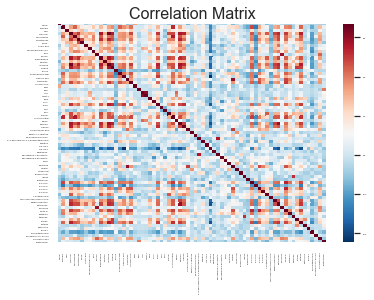

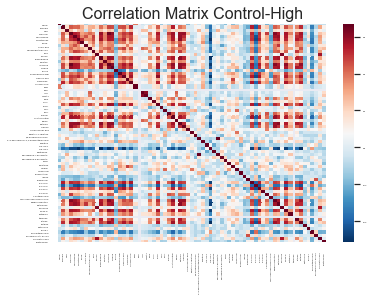

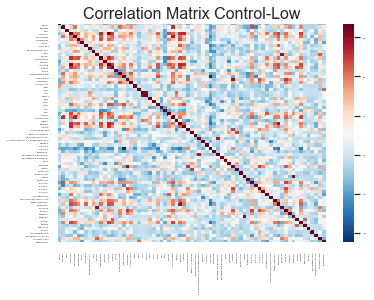

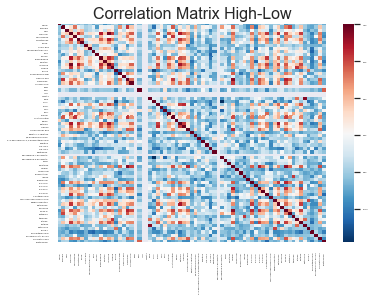

In [101]:
# correlation between features
# all groups
corr1 = data.corr()
plt.title("Correlation Matrix", fontsize=16)
sns.set(font_scale=0.2)
sns.heatmap(corr1, cbar=True, cmap="RdBu_r")
plt.show()
#Control-high 
corr2 = C_H.corr()
plt.title("Correlation Matrix Control-High", fontsize=16)
sns.set(font_scale=0.2)
sns.heatmap(corr2, cbar=True, cmap="RdBu_r")
plt.show()
#Control-low
corr3 = C_L.corr()
plt.title("Correlation Matrix Control-Low", fontsize=16)
sns.set(font_scale=0.2)
sns.heatmap(corr3, cbar=True, cmap="RdBu_r")
plt.show()
#High-low
corr4 = H_L.corr()
plt.title("Correlation Matrix High-Low", fontsize=16)
sns.set(font_scale=0.2)
sns.heatmap(corr4, cbar=True, cmap="RdBu_r")
plt.show()
#feature's value

## ANOVA test

In [36]:
col = data.columns
p_value = pd.DataFrame(columns=data.columns[2:], index = {'c-h','c-l','h-l','c-l-h'})
#Control-high 
for i in range(71):
    p_value.iloc[0,i] = stats.f_oneway(C_H.loc[C_H.type=='Control',col[i+2]], C_H.loc[C_H.type=='High-risk',col[i+2]]).pvalue
#Control-low
for i in range(71):
    p_value.iloc[1,i] = stats.f_oneway(C_L.loc[C_L.type=='Control',col[i+2]], C_L.loc[C_L.type=='Low-risk',col[i+2]]).pvalue
#High-low
for i in range(71):
    p_value.iloc[2,i] = stats.f_oneway(H_L.loc[H_L.type=='Low-risk',col[i+2]], H_L.loc[H_L.type=='High-risk',col[i+2]]).pvalue
#Control-High-Low
for i in range(71):
    p_value.iloc[3,i] = stats.f_oneway(data.loc[data.type=='Control',col[i+2]], data.loc[data.type=='High-risk',col[i+2]], data.loc[data.type=='Low-risk',col[i+2]]).pvalue
p_value

,GSSG,8-OH-dG,GSH,L-Leucine,L-Kynurenine,L-Tryptophan,5-HTP,Cholic acid,N-phenylacetylglycine,5-HT,...,glutamine,threonine,betaine,histidine,methionine,serine-1,pyroglutamic acid,benzene acetyl glycine,N6-acetyl lysine,nicotinamide
h-l,0.15932,6.98782e-09,0.00575863,1.03135e-06,2.61701e-09,7.01704e-14,2.56362e-06,0.010429,5.42854e-05,4.07227e-05,...,0.00169991,NaN,8.31953e-07,9.60494e-11,0.349767,0.298128,6.64282e-05,0.349767,0.00543174,0.398818
c-l,0.202322,2.50982e-05,0.329883,0.0325505,1.18777e-05,0.0049609,0.231547,0.024663,0.143743,0.000941066,...,0.256449,0.428841,0.244786,0.000847269,0.428841,0.344149,0.279188,0.428841,0.506635,0.772958
c-h,0.677043,0.0863528,0.0797991,5.26504e-06,0.159121,2.82651e-07,0.00015673,0.488261,0.000517146,0.0149459,...,0.0730297,0.403844,0.00229081,1.21195e-08,0.61104,0.403844,0.00121989,0.847397,0.0034866,0.659687
c-l-h,0.217811,1.87098e-08,0.0354693,2.64746e-07,1.71435e-08,7.29605e-12,1.46332e-05,0.00876602,0.000126989,5.4346e-06,...,0.0224189,0.514451,0.000162216,5.40189e-12,0.634968,0.374031,4.18536e-05,0.695115,0.00896914,0.777933


In [92]:
s = (p_value<0.05).all()
feature_mean = p_value[s[s].index].columns
feature_mean

Index(['L-Leucine', 'L-Tryptophan', '5-HT', 'Phenylalanine', 'Isoleucine',
       'L-Valine', 'Phenylpyruvic acid', 'Ascorbic acid', 'Cl-Tyr',
       'Acetylcarnitine', 'Glutamic', 'LPC(16:0)', 'LPC(18:0)',
       'Hexanoylcarnitine', 'Glutamic26', 'histidine'],
      dtype='object')

In [ ]:
p_value[feature_mean]

## K-S test

In [31]:
col = data.columns
KS = pd.DataFrame(columns=data.columns[2:], index = {'c-h','c-l','h-l'})
#Control-High
for i in range(71):
    KS.iloc[0,i] = stats.ks_2samp(C_H.loc[C_H.type=='Control',col[i+2]], C_H.loc[C_H.type=='High-risk',col[i+2]]).pvalue
#Control-low
for i in range(71):
    KS.iloc[1,i] = stats.ks_2samp(C_L.loc[C_L.type=='Control',col[i+2]], C_L.loc[C_L.type=='Low-risk',col[i+2]]).pvalue
#High-low
for i in range(71):
    KS.iloc[2,i] = stats.ks_2samp(H_L.loc[H_L.type=='Low-risk',col[i+2]], H_L.loc[H_L.type=='High-risk',col[i+2]]).pvalue
KS

,GSSG,8-OH-dG,GSH,L-Leucine,L-Kynurenine,L-Tryptophan,5-HTP,Cholic acid,N-phenylacetylglycine,5-HT,...,glutamine,threonine,betaine,histidine,methionine,serine-1,pyroglutamic acid,benzene acetyl glycine,N6-acetyl lysine,nicotinamide
h-l,0.911269,1.13169e-09,0.069156,1.00324e-05,1.23891e-08,5.95631e-11,1.7518e-06,0.0243058,4.24504e-07,0.000109016,...,0.00283349,1,1.7518e-06,1.13169e-09,1,1,0.000805571,1,0.00121555,0.89265
c-h,0.865829,7.97303e-08,0.34904,0.202921,4.25936e-07,0.00973138,0.183837,0.0227844,0.127951,0.00146238,...,0.0989188,1,0.00121628,0.000542783,1,1,0.999999,1,0.780417,0.635586
c-l,0.996659,0.0349722,0.501073,0.000152828,0.540032,2.24628e-06,2.68855e-05,0.943587,5.12994e-06,0.0789308,...,0.0462648,1,0.000733557,3.0713e-11,1,1,0.00164834,1,0.00351571,0.821633


In [6]:
d = (KS>0.05).all()
feature_ks = KS.drop(d[d].index, axis=1).columns
feature_ks

Index(['8-OH-dG', 'L-Leucine', 'L-Kynurenine', 'L-Tryptophan', '5-HTP',
       'Cholic acid', 'N-phenylacetylglycine', '5-HT', 'Glycine',
       'Phenylalanine', 'Creatine', 'Isoleucine', 'L-Valine', 'Proline',
       'Phenylpyruvic acid', 'Hippuric acid', 'Spermidine', 'Ascorbic acid',
       'N-Tyr', 'Cl-Tyr', 'Choline', 'Acetylcarnitine', 'Glutamic', 'Alanine',
       'Aminohippuric acid', 'C18:1LPC', 'Glucosamine-6-phosphate', 'Taurine',
       'Inosine', 'LPC(16:0)', 'LPC(18:0)', 'LPC(20:1)', 'LPC(22:6)',
       'L-Glutamic acid', 'Glycochenodeoxycholic acid', 'Hexanoylcarnitine',
       'Glutamic26', 'PE(36:4)', 'glutamine', 'betaine', 'histidine',
       'pyroglutamic acid', 'N6-acetyl lysine'],
      dtype='object')

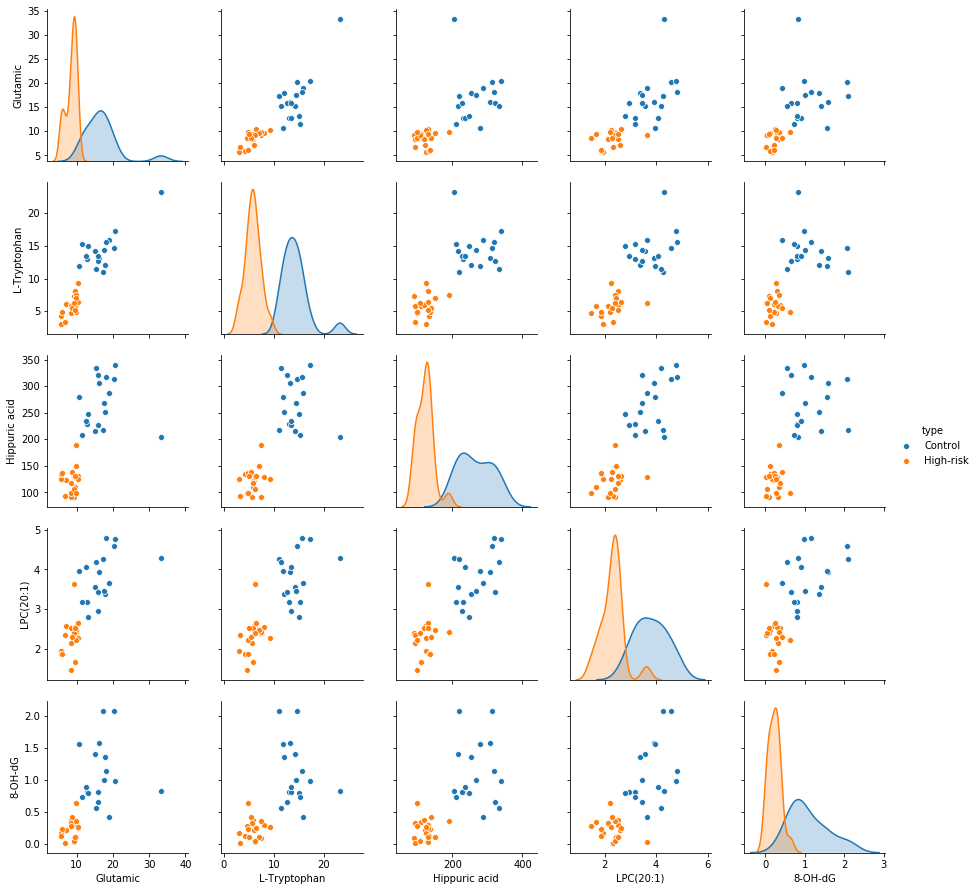

In [32]:
ch = KS.iloc[0,:]
f1 = ch.sort_values().index[:5]
sns.pairplot(pd.concat([C_H['type'],C_H[f1]],axis=1), hue = 'type', diag_kind ='kde')
#plt.title('scatterpoint', size = 28)
#plt.xlabel(feature_ks)
#plt.savefig("scatterpoint.pdf")
plt.show()

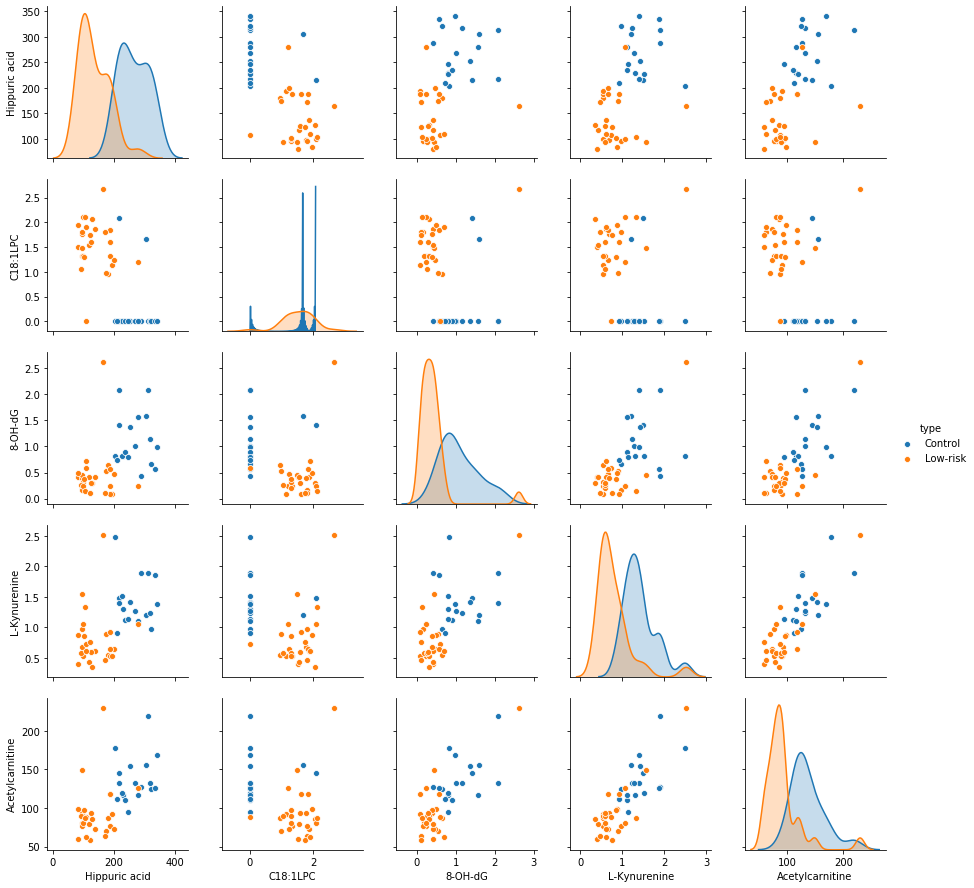

In [33]:
cl = KS.iloc[1,:]
f2 = cl.sort_values().index[:5]
sns.pairplot(pd.concat([C_L['type'],C_L[f2]],axis=1), hue = 'type', diag_kind ='kde')
#plt.title('scatterpoint', size = 28)
#plt.xlabel(feature_ks)
#plt.savefig("scatterpoint.pdf")
plt.show()

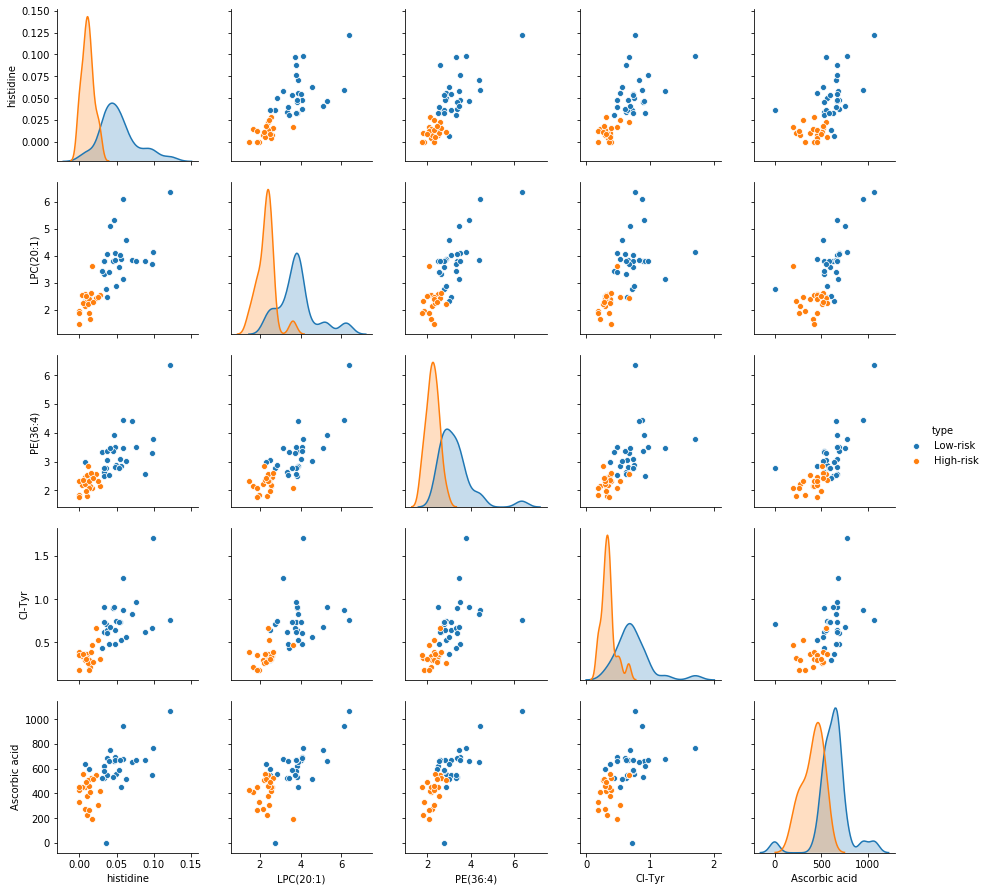

In [34]:
lh = KS.iloc[2,:]
f1 = lh.sort_values().index[:5]
sns.pairplot(pd.concat([H_L['type'],H_L[f1]],axis=1), hue = 'type', diag_kind ='kde')
#plt.title('scatterpoint', size = 28)
#plt.xlabel(feature_ks)
#plt.savefig("scatterpoint.pdf")
plt.show()

## Boxplot & Scatterpoint - variables with significant difference

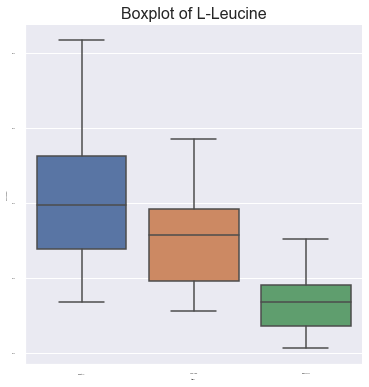

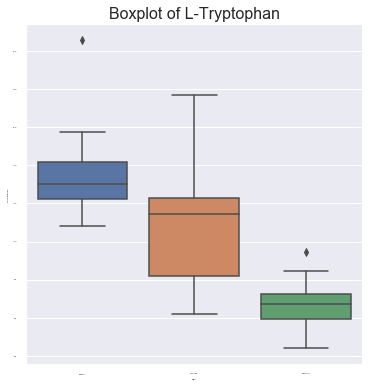

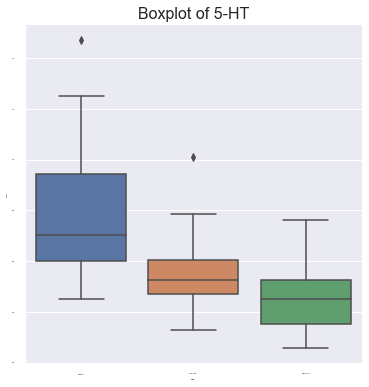

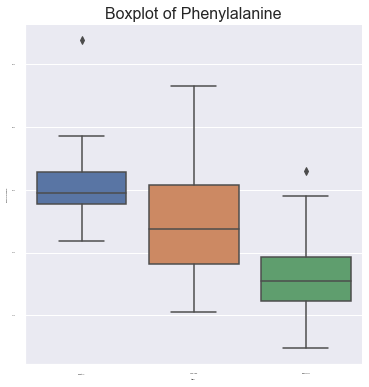

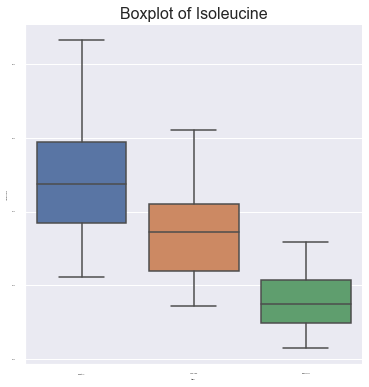

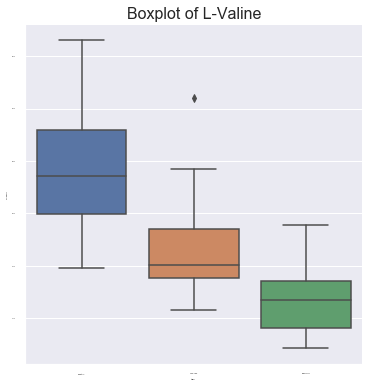

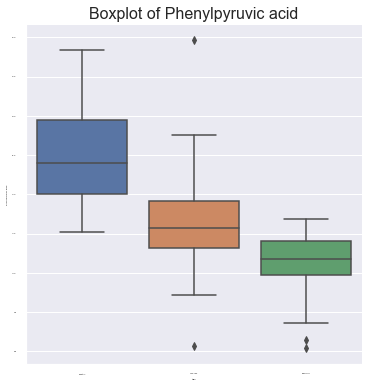

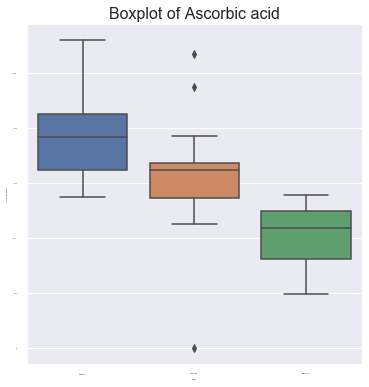

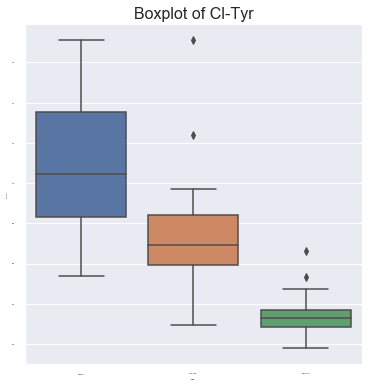

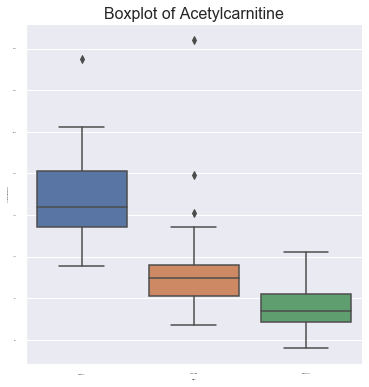

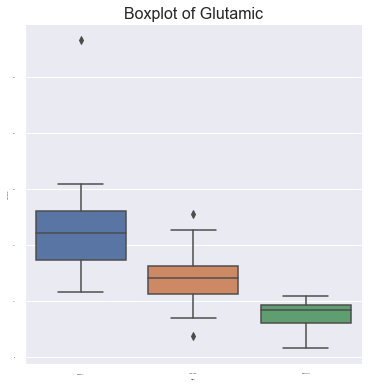

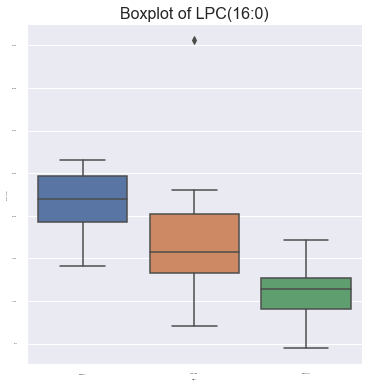

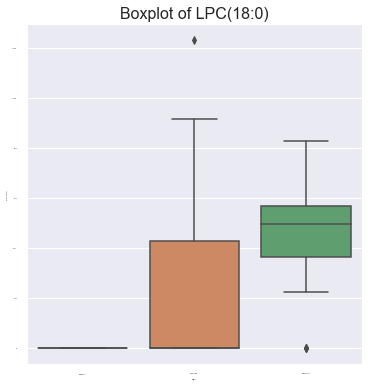

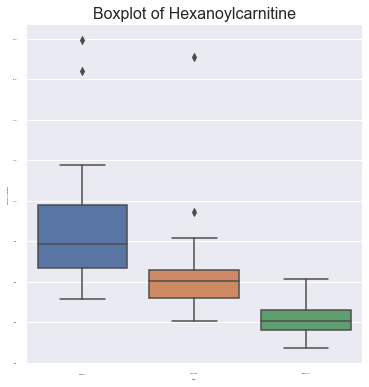

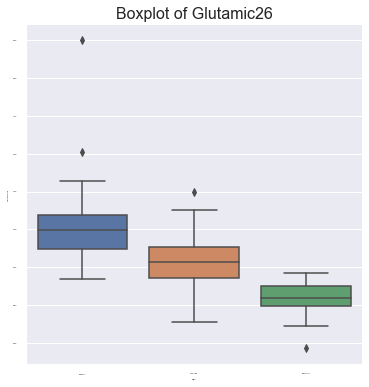

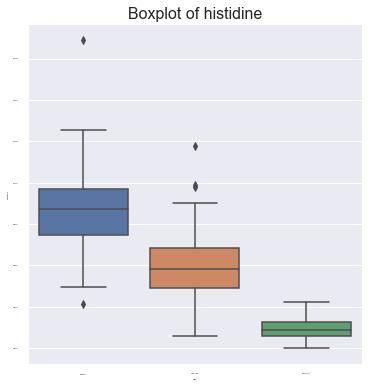

In [77]:
for i in range(len(feature)):
    sns.catplot(x="type",y=feature_mean[i],data=data, kind="box") 
    plt.title("Boxplot of " + feature_mean[i], fontsize=16)
    plt.show()

## Lasso

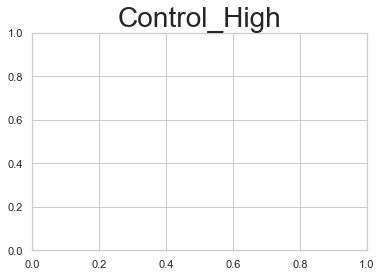

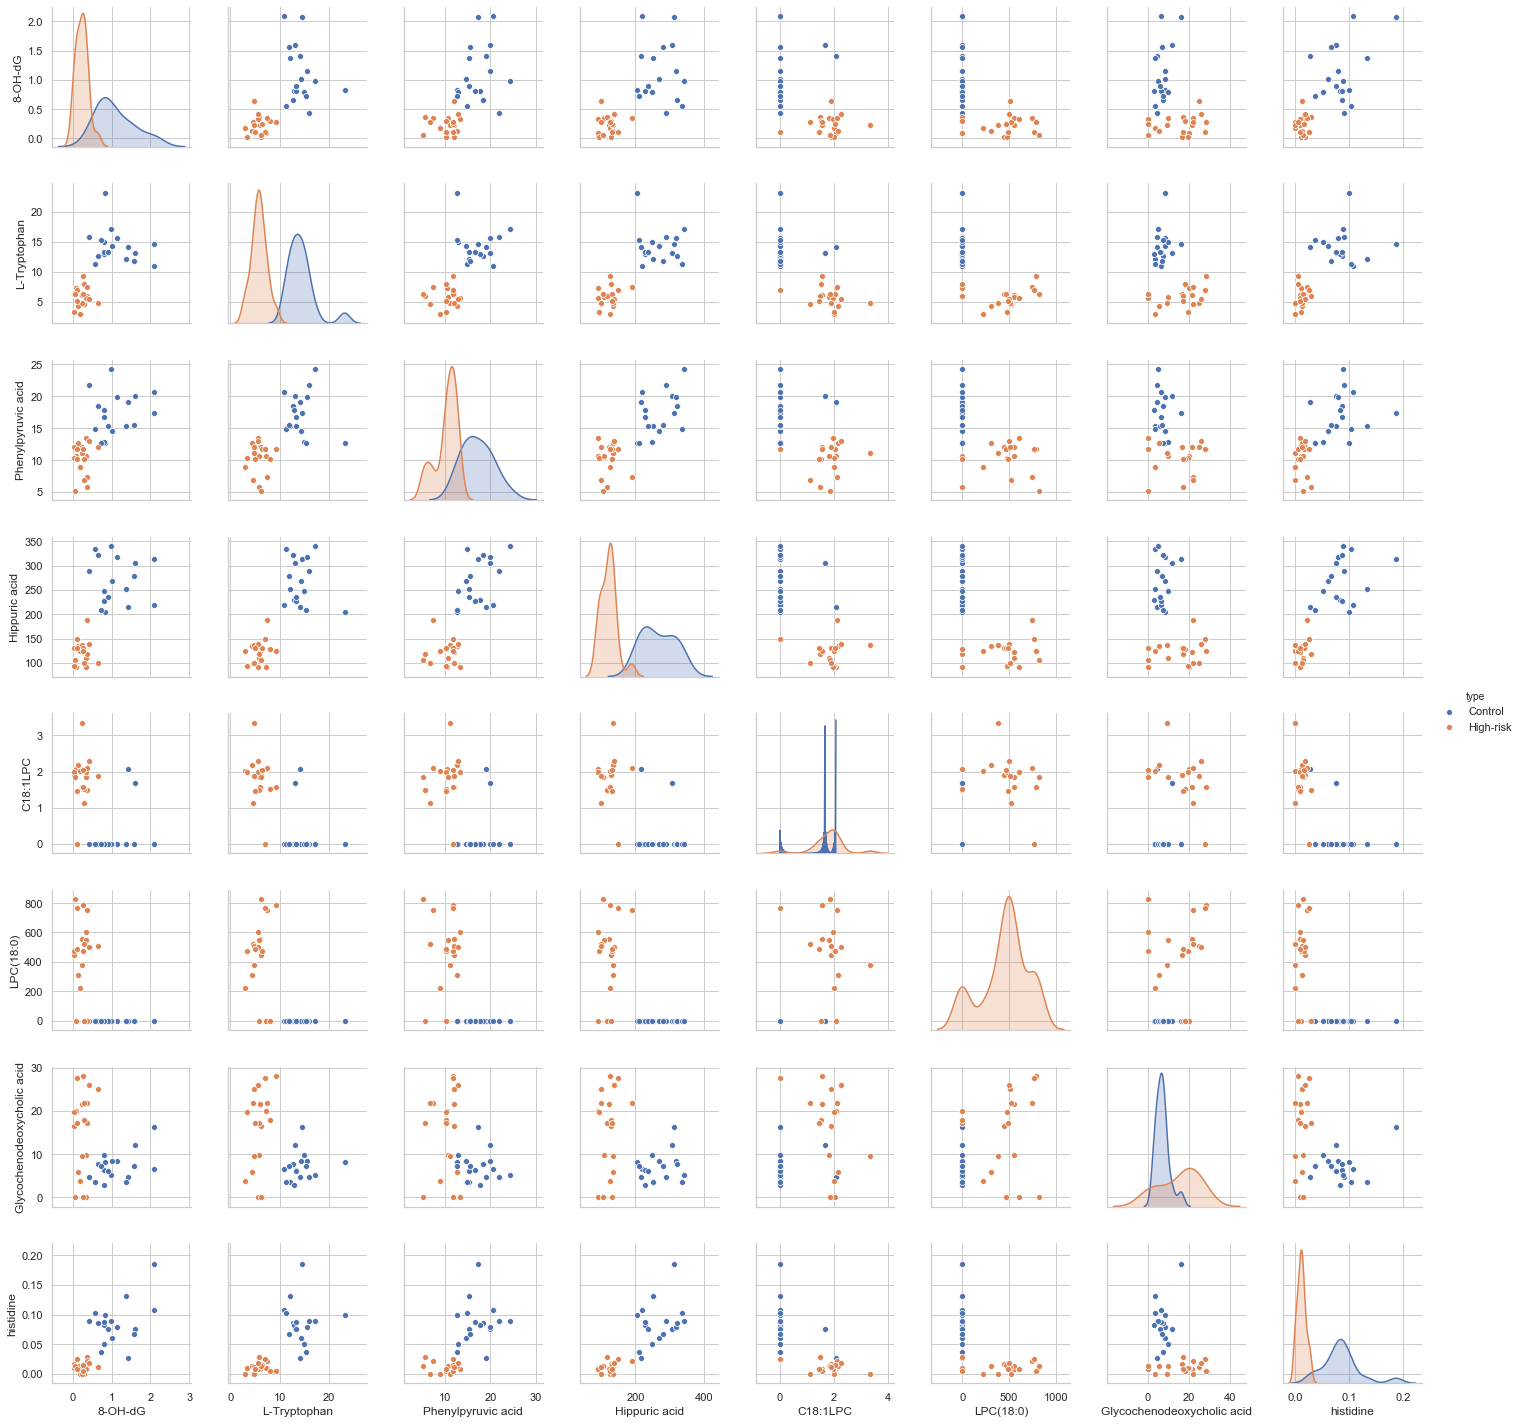

In [62]:
#C-H
feature1 = ['8-OH-dG','L-Tryptophan','Phenylpyruvic acid','Hippuric acid','C18:1LPC','LPC(18:0)', 'Glycochenodeoxycholic acid','histidine']
#p_value[feature1]
sns.pairplot(pd.concat([C_H['type'],C_H[feature1]],axis=1), hue = 'type', diag_kind ='kde')
plt.title('Control_High', size = 28)
#plt.savefig("scatterpoint.pdf")
plt.show()


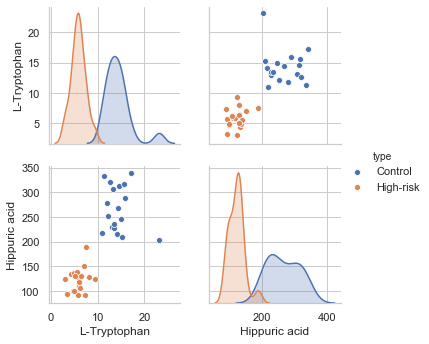

In [66]:
#feature1 = ['8-OH-dG','L-Tryptophan','Phenylpyruvic acid','Hippuric acid','C18:1LPC','LPC(18:0)', 'Glycochenodeoxycholic acid','histidine']
#p_value[feature1]
f =['L-Tryptophan', 'Hippuric acid']
sns.set(style='whitegrid')
sns.pairplot(pd.concat([C_H['type'], C_H[f]], axis=1), hue = 'type', diag_kind ='kde')
#plt.title('Control - High',fontsize=28)
#ax.tick_params(labelsize = 8)
plt.savefig("1.pdf")
plt.show()

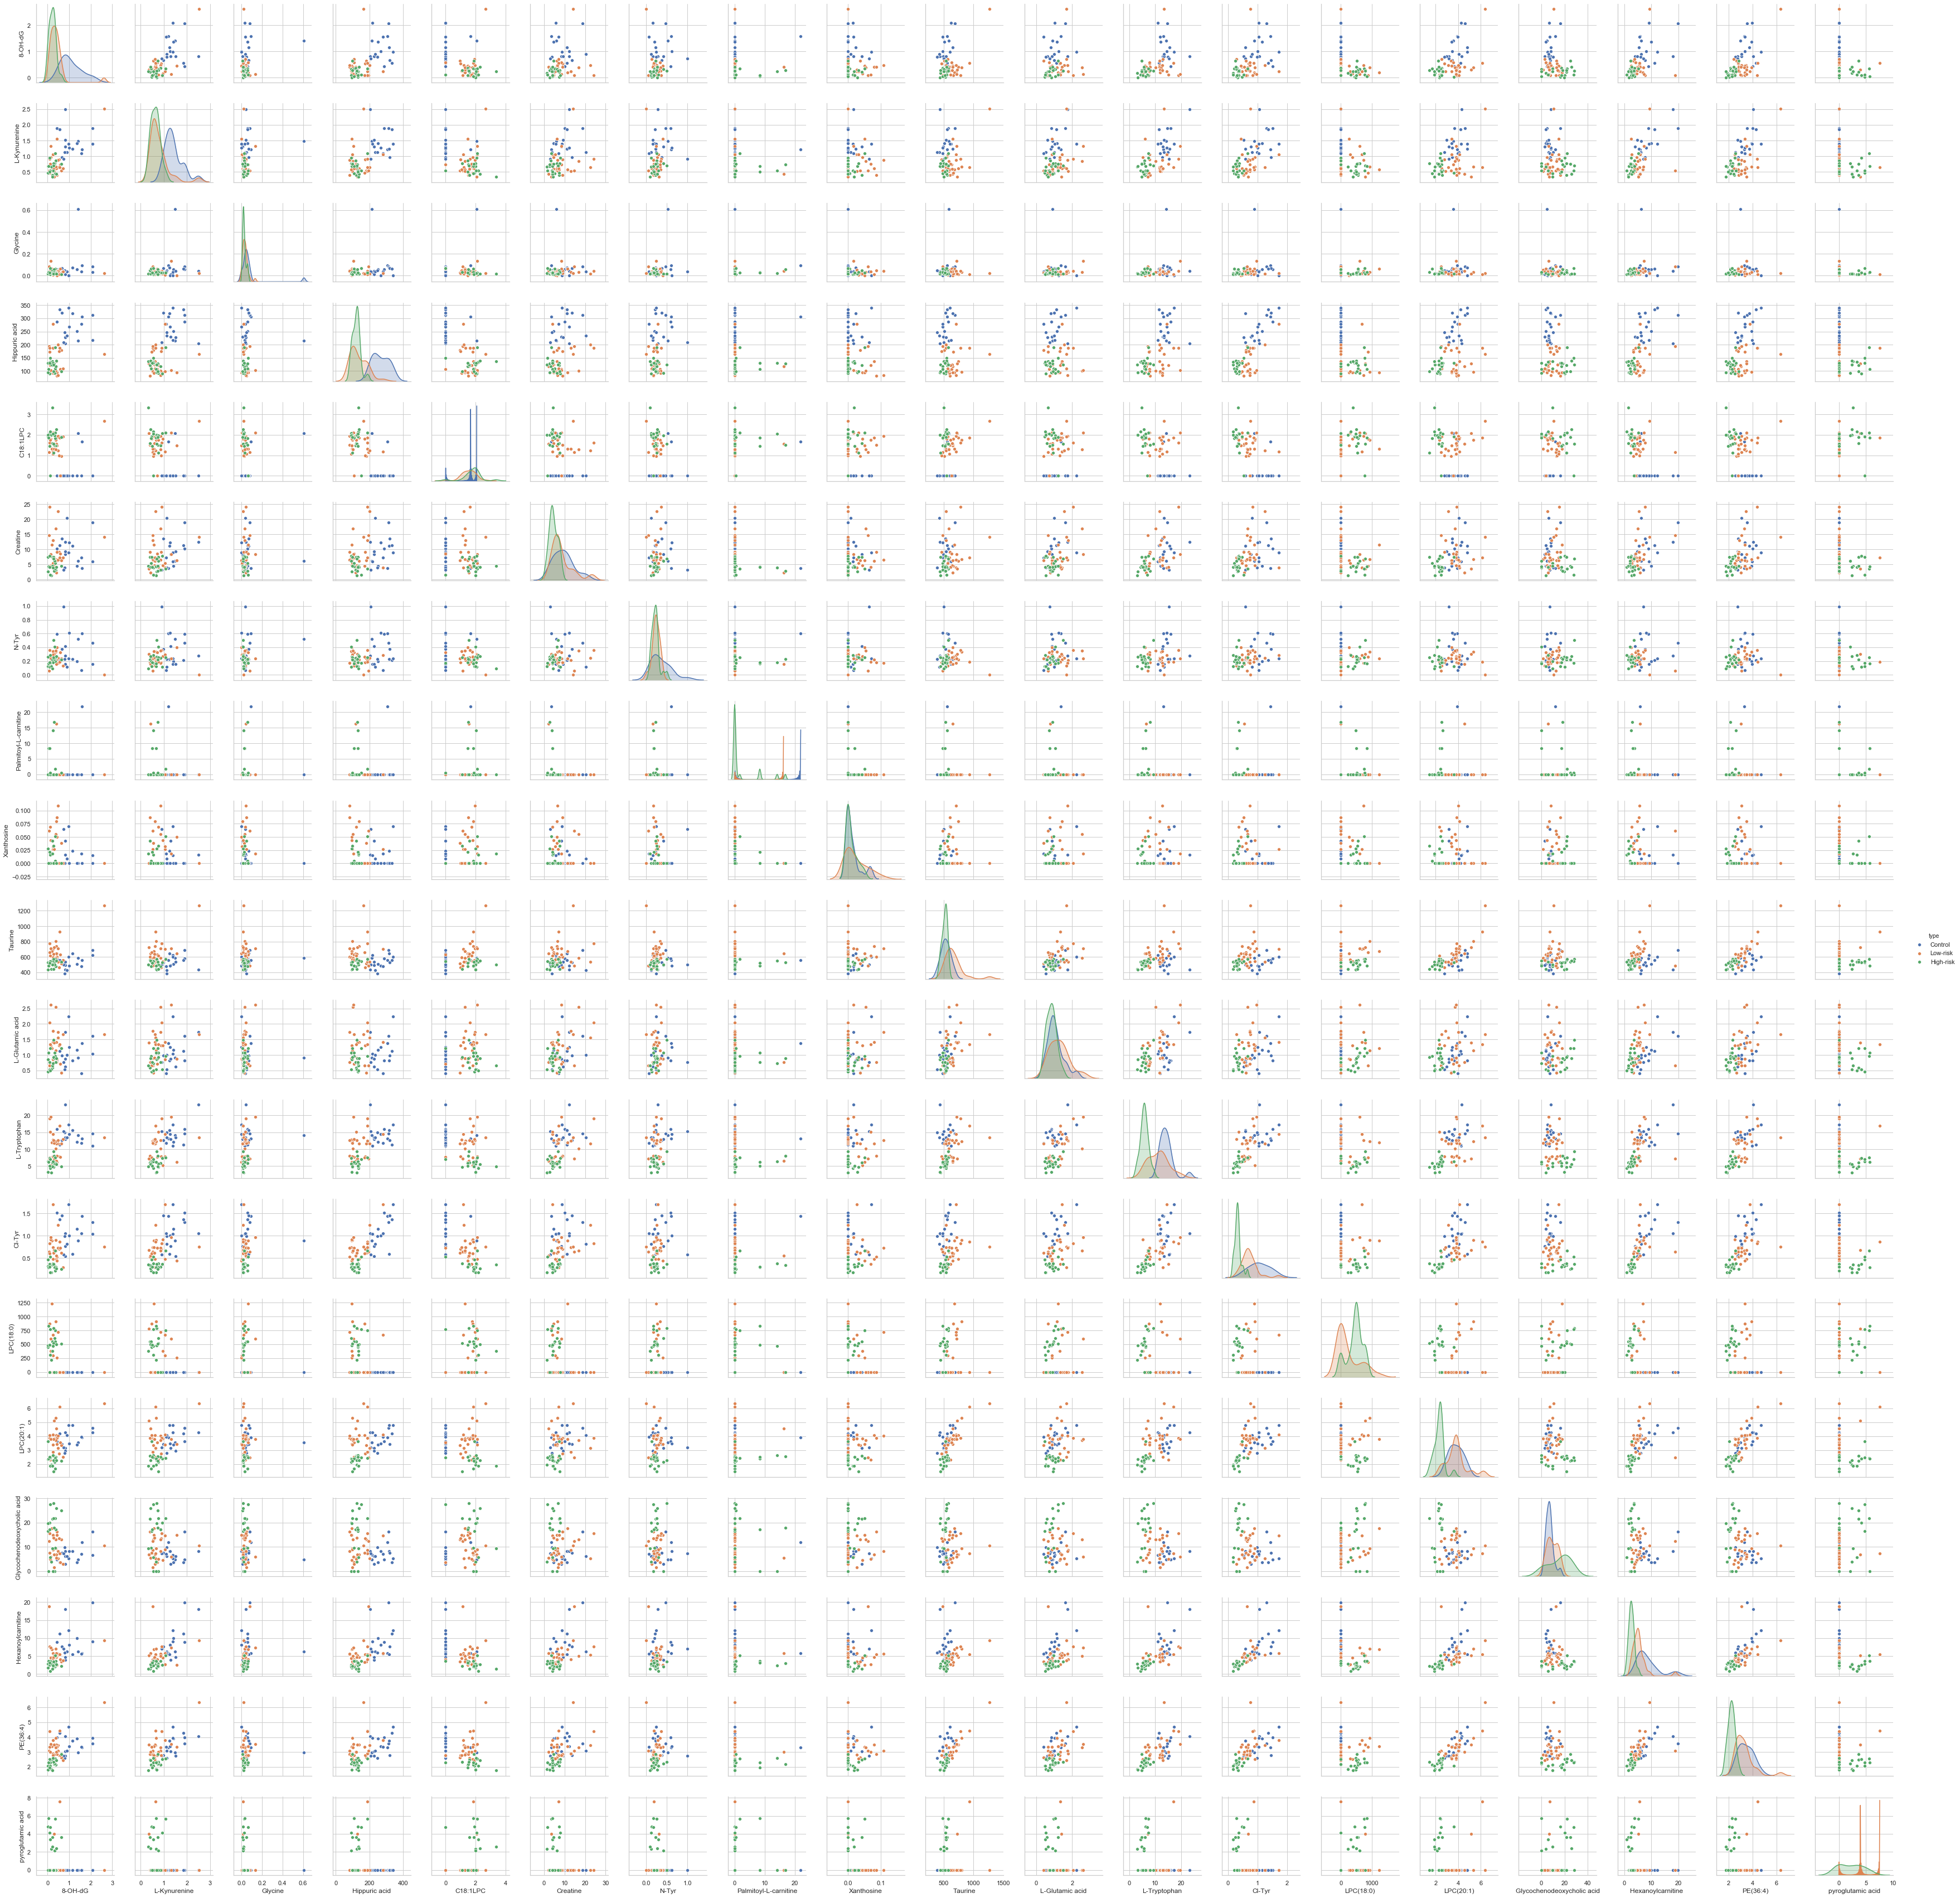

In [73]:
f2 = ['type', '8-OH-dG','L-Kynurenine', 'Glycine', 'Hippuric acid','C18:1LPC', 'Creatine', 'N-Tyr', 'Palmitoyl-L-carnitine' , 'Xanthosine' , 'Taurine', 'L-Glutamic acid','L-Tryptophan','Cl-Tyr' , 'LPC(18:0)', 'LPC(20:1)', 'Glycochenodeoxycholic acid', 'Hexanoylcarnitine', 'PE(36:4)','pyroglutamic acid']

sns.set(style='whitegrid')
sns.pairplot(data[f2], hue = 'type', diag_kind ='kde')
#plt.title('Mluti-class',fontsize=28)
#ax.tick_params(labelsize = 8)
#plt.savefig("2.pdf")
plt.show()


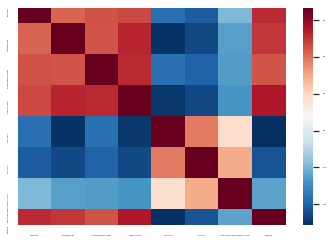

In [35]:
feature1 = ['8-OH-dG','L-Tryptophan','Phenylpyruvic acid','Hippuric acid','C18:1LPC','LPC(18:0)', 'Glycochenodeoxycholic acid','histidine']
corr5 = C_H[feature1].corr()
plt.title("Correlation Matrix High-Low", fontsize=16)
sns.set(font_scale=0.2)
sns.heatmap(corr5, cbar=True, cmap="RdBu_r")
plt.show()